<a href="https://colab.research.google.com/github/gagao9815/STA365-Week3-Homework/blob/main/Homework3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files


uploaded = files.upload()


Saving csvdata.csv to csvdata (2).csv


/usr/local/lib/python3.10/dist-packages/pymc/model.py:1363: ImputationWarning: Data in y_obs contains missing values and will be automatically imputed from the sampling distribution.
  warnings.warn(impute_message, ImputationWarning)


/usr/local/lib/python3.10/dist-packages/arviz/utils.py:187: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  numba_fn = numba.jit(**self.kwargs)(self.function)


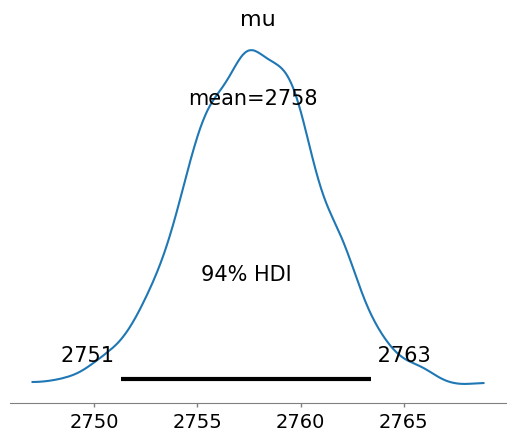

In [ ]:
import numpy as np
import pymc as pm

# Read data from csv file
csvdata = np.genfromtxt('csvdata.csv', delimiter=',', names=['Price', 'Demand'])

with pm.Model() as model:
    # Define priors
    mu = pm.Normal('mu', mu=0, sigma=10)
    sigma = pm.HalfNormal('sigma', sigma=1)

    # Define likelihood
    y_obs = pm.Normal('y_obs', mu=mu, sigma=sigma, observed=csvdata['Price'])

    # Posterior sampling
    trace = pm.sample(1000, tune=1000, cores=1, random_seed=1234)

    # Plot posterior distribution of mu
    pm.plot_posterior(trace, var_names=['mu'])


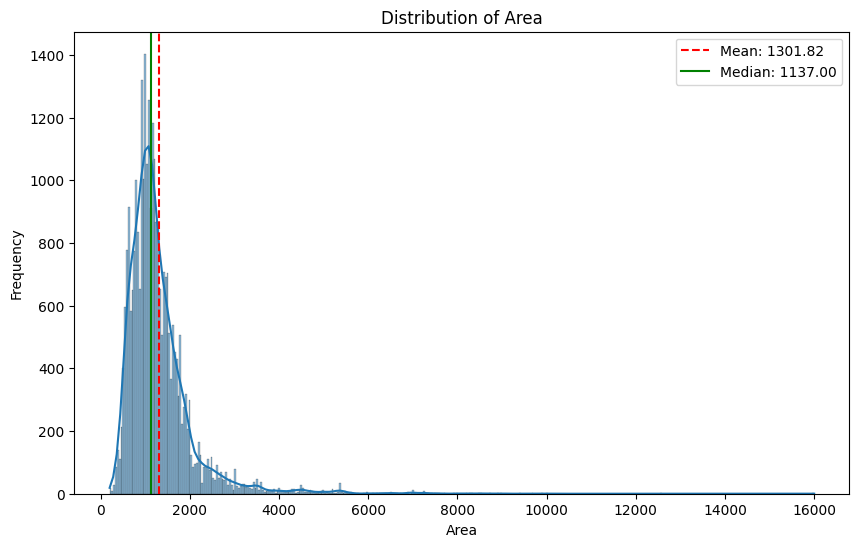

Mean of Area: 1301.8164750300325
Median of Area: 1137.0
Skewness of Area: 3.552801761662718
Kurtosis of Area: 23.890661769470125


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, kurtosis

# Load the data
file_path = 'csvdata.csv'  # Replace with your file path
data = pd.read_csv(file_path)

# Extracting the 'Area' column
area_data = data['Area']

# Calculating statistical properties
mean_area = area_data.mean()
median_area = area_data.median()
skewness_area = skew(area_data)
kurtosis_area = kurtosis(area_data, fisher=True)  # Fisher=True returns the excess kurtosis

# Plotting the distribution
plt.figure(figsize=(10, 6))
sns.histplot(area_data, kde=True)
plt.title('Distribution of Area')
plt.xlabel('Area')
plt.ylabel('Frequency')
plt.axvline(mean_area, color='r', linestyle='--', label=f'Mean: {mean_area:.2f}')
plt.axvline(median_area, color='g', linestyle='-', label=f'Median: {median_area:.2f}')
plt.legend()
plt.show()

# Printing the results
print("Mean of Area:", mean_area)
print("Median of Area:", median_area)
print("Skewness of Area:", skewness_area)
print("Kurtosis of Area:", kurtosis_area)


In [ ]:
import pymc as pm
import numpy as np
import pandas as pd

# Load your data
data = pd.read_csv('csvdata.csv')
area_data = data['Area']

# Log-transforming the 'Area' data
log_area_data = np.log(area_data)

# Define the Bayesian model
with pm.Model() as model:
    # Priors for unknown model parameters
    mu = pm.Normal('mu', mu=np.mean(log_area_data), sigma=np.std(log_area_data))
    sigma = pm.HalfNormal('sigma', sigma=1)

    # Likelihood (sampling distribution) of observations
    Y_obs = pm.Lognormal('Y_obs', mu=mu, sigma=sigma, observed=log_area_data)

    # Draw posterior samples
    trace = pm.sample(1000, tune=500)

# Summary of the trace
summary = pm.summary(trace)
print(summary)



        mean   sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  ess_tail  \
mu     1.951  0.0   1.951    1.952        0.0      0.0    1938.0    1435.0   
sigma  0.066  0.0   0.065    0.066        0.0      0.0    1757.0    1331.0   

       r_hat  
mu       1.0  
sigma    1.0  


        mean   sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  ess_tail  \
mu     1.951  0.0   1.951    1.952        0.0      0.0    2129.0    1206.0   
sigma  0.066  0.0   0.065    0.066        0.0      0.0    2070.0    1287.0   

       r_hat  
mu       1.0  
sigma    1.0  


array([<Axes: title={'center': 'mu\n0'}>,
       <Axes: title={'center': 'mu\n1'}>,
       <Axes: title={'center': 'sigma\n0'}>,
       <Axes: title={'center': 'sigma\n1'}>], dtype=object)

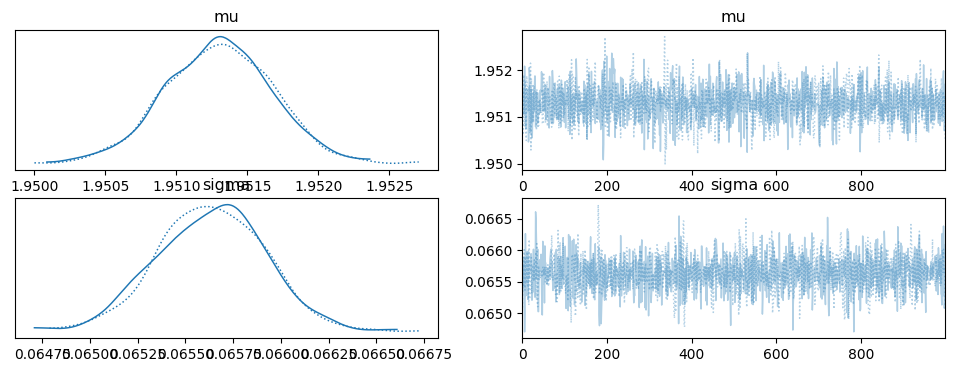

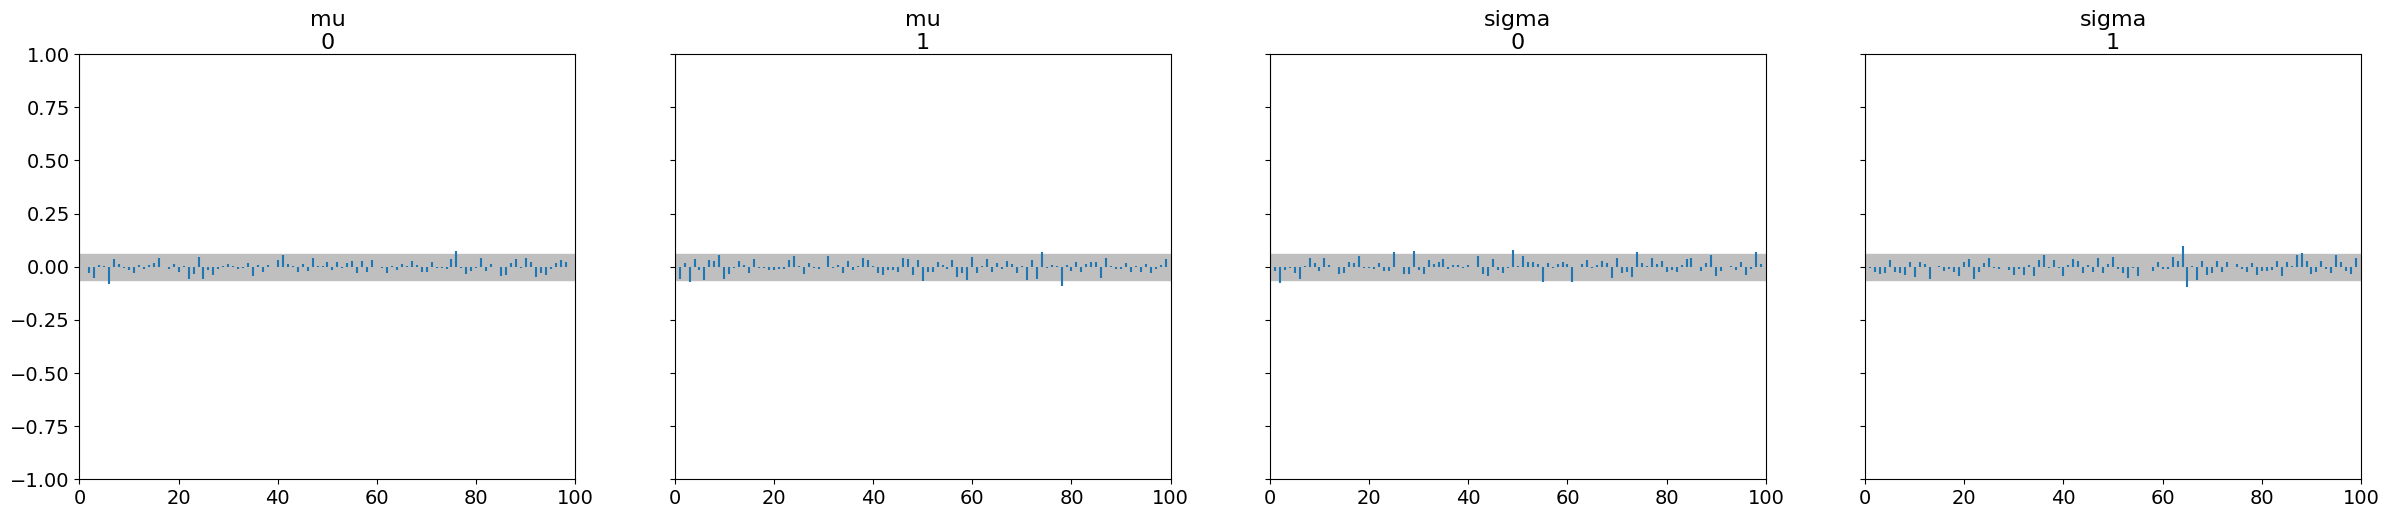

In [ ]:
import pymc as pm
import numpy as np
import pandas as pd
import arviz as az

# Load your data
data = pd.read_csv('csvdata.csv')
area_data = data['Area']

# Log-transforming the 'Area' data
log_area_data = np.log(area_data)

# Define the Bayesian model
with pm.Model() as model:
    # Priors for unknown model parameters
    mu = pm.Normal('mu', mu=np.mean(log_area_data), sigma=np.std(log_area_data))
    sigma = pm.HalfNormal('sigma', sigma=1)

    # Likelihood (sampling distribution) of observations
    Y_obs = pm.Lognormal('Y_obs', mu=mu, sigma=sigma, observed=log_area_data)

    # Draw posterior samples
    trace = pm.sample(1000, tune=500)

# Summary of the trace
summary = pm.summary(trace)
print(summary)

# MCMC Diagnostics
# Traceplot
az.plot_trace(trace)

# Autocorrelation Plot
az.plot_autocorr(trace)
